## Data Exploration
#### Exploring high level trends within the dataset

The data is downloaded from Kaggle for The Hewlett Foundation: Automatic Essay Scoring competition - https://www.kaggle.com/c/asap-aes.

Our goal is to understanding the underlying trends within the dataset to build better hypotheses. 

In [1]:
import sys
sys.path.append('./utils')

In [2]:
#Imports
from requirements import *
import helperfunctions as helper

/home/alphamike/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [51]:
X_all = pd.read_csv("model_and_visualization/features_set_1.csv")
y_all = pd.read_csv("model_and_visualization/target_set_1.csv")
X_all = X_all.drop('Unnamed: 0',axis=1)
y_all = y_all.drop('Unnamed: 0',axis=1)

X_all.head()

,essay,word_count,long_word_count,avg_word_length_per_essay,wrong_words,no_of_domain_words,word_to_sent_ratio,num_of_characters,sentence_count,noun_count,verb_count,comma_count,punctuation_count,adjective_count,adverb_count,quotation_mark_count,spelling_mistakes
0,"Dear local newspaper, I think effects computer...",236,54,4.83,67,169,14.75,1819,16,78,51,15,17,24,10,4,0
1,"Dear @CAPS1 @CAPS2, I believe that using compu...",281,76,4.93,56,225,16.53,2205,17,94,66,11,17,18,17,3,1
2,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",188,51,5.01,34,154,13.43,1482,14,68,43,8,14,17,10,4,6
3,"Dear Local Newspaper, @CAPS1 I have found that...",346,109,5.38,76,270,13.31,2817,26,134,64,12,26,38,21,5,14
4,"Dear @LOCATION1, I know having computers has a...",318,81,4.99,88,230,10.60,2533,30,107,57,12,30,21,24,5,3


### Examine Dataset

First, let us examine a data point:

In [52]:
X_all['essay'][11]

"Dear @CAPS1 @CAPS2 I feel that computers do take away from peoples life and aren\xe2\x80\x99t as important than the other factors of life. First of all you know that the world is becoming obease because of lack of exercise. Also people don't realize that @CAPS3 warming is becomeing a big problum. Finally familys arn't as close as they used to be. these are all the reasons why computers arn't important to human socioty. First of the world is becomeing obease and cumputers play a huge part in this. Computers don't make people exercise they basicly just sit down on there couch and use the computer this won't help amarica get back into shape. Also computers become a habbit if a person uses a computer everyday of there life it will become an addiction then they won't be able to stop. Finally when people use the computer they don't realize the lack exersise there getting. This is the first reason why computeres are a bad thing. Next @CAPS3 warming is mealting the polar ice caps. Computers p

Fortunately, there is not much cleaning that needs to be done. However, you'll notice that external references are replaced with an "@TEXT" formatted label. We don't foresee this causing any issues considering each essay generally contains around the same number of external references. We will however remove those key words when analyzing the number of spelling mistakes in each essay. The **character_filter** function below accomplishes this. 

### Analysis

Before analyzing the data, we must logically decide what features will impact the quality of an essay. We came up with six features:

1. Essay Length: How much content are they putting out?
2. Average Sentence Length: Are the sentences short and concise or long and convoluted?
3. Average Word Length: Are they using a sophisticated vocabulary?
4. Essay Sentiment: Does positivity or negativity affect the grade of an essay?
5. Grammar Mistakes: How often is the author making grammar mistakes?
6. Spelling Mistakes: How often is the author making spelling mistakes?

These six key features will allow us to gain some insight into what is happening in our data. to calculate this, the **TextBlob** package was used.

### Visualization

The plots below will allow you to view the underlying trends within the data. The plots below visualize how the 6 features above impact the grade of an essay.

### Visualizing the features

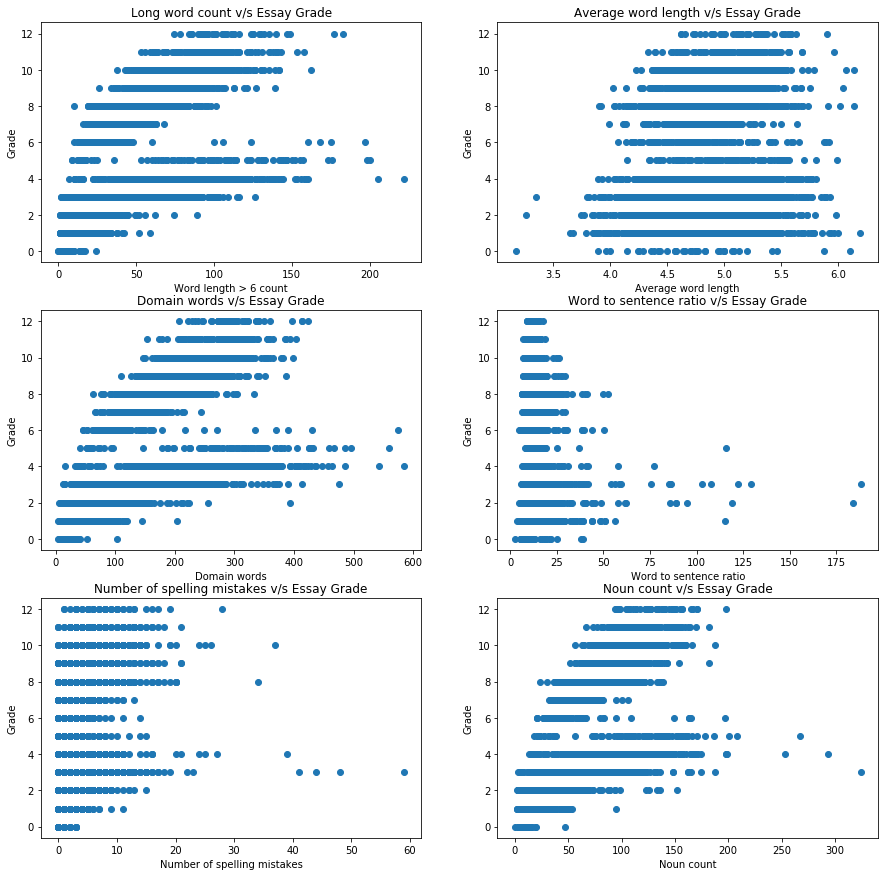

In [50]:
%matplotlib inline

fig, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 15))
ax1.scatter(X_all['long_word_count'],y_all)
ax1.set_ylabel('Grade')
ax1.set_xlabel('Word length > 6 count')
ax1.set_title('Long word count v/s Essay Grade')

ax2.scatter(X_all['avg_word_length_per_essay'],y_all)
ax2.set_ylabel('Grade')
ax2.set_xlabel('Average word length')
ax2.set_title('Average word length v/s Essay Grade')

ax3.scatter(X_all['no_of_domain_words'],y_all)
ax3.set_ylabel('Grade')
ax3.set_xlabel('Domain words')
ax3.set_title('Domain words v/s Essay Grade')

ax4.scatter(X_all['word_to_sent_ratio'],y_all)
ax4.set_ylabel('Grade')
ax4.set_xlabel('Word to sentence ratio')
ax4.set_title('Word to sentence ratio v/s Essay Grade')

ax5.scatter(X_all['spelling_mistakes'],y_all)
ax5.set_ylabel('Grade')
ax5.set_xlabel('Number of spelling mistakes')
ax5.set_title('Number of spelling mistakes v/s Essay Grade')

ax6.scatter(X_all['noun_count'],y_all)
ax6.set_ylabel('Grade')
ax6.set_xlabel('Noun count')
ax6.set_title('Noun count v/s Essay Grade')

fig.savefig('model_and_visualization/Essay123Features.png', bbox_inches = "tight")



As expected, we were able to see general trends between the sentence structure of an essay and the grade it received. What was unexpected was the fact that the faults of an essay did not carry much weight. Noteably, we see that it is not uncommon to see essays with a large number of spelling mistakes receive a high grade. One could make the assumption that techonology's (Word's Spell Check) influence on writing has made it less imperitive for students to spell correctly. It seems as though the message carries more weight than specific errors in the essay.